In [1]:

# Description: This program classifies images

# Import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
#get the shape of the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', x_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 32, 32, 3)


In [11]:
#take a look at the first image as an array
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

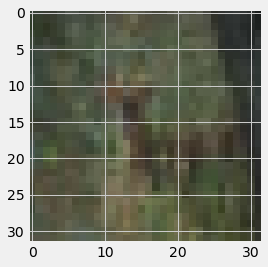

In [12]:
# Show the image as a picture
img=plt.imshow(x_train[index])

In [13]:
# Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [14]:
# Get the image classification
classification=['airplane', 'autombile', 'bird', 'cat','deer', 'dog','frog','horse','ship','truck']
# print the image class
print('The image class is', classification[y_train[index][0]])

The image class is deer


In [15]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [16]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
# Print the new label of the image/picture above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [18]:
# Normalized the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255


In [19]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [21]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))


# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [22]:
# Compile the model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
# Train the model
hist=model.fit(x_train, y_train_one_hot,
              batch_size=256,
              epochs=10,
              validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 65ms/step - loss: 2.0252 - accuracy: 0.2332 - val_loss: 1.4975 - val_accuracy: 0.4442
Epoch 2/10
157/157 [==============================] - 10s 62ms/step - loss: 1.4741 - accuracy: 0.4551 - val_loss: 1.2830 - val_accuracy: 0.5398
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 1.3111 - accuracy: 0.5207 - val_loss: 1.2016 - val_accuracy: 0.5708
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 1.2018 - accuracy: 0.5702 - val_loss: 1.1381 - val_accuracy: 0.5948
Epoch 5/10
157/157 [==============================] - 10s 66ms/step - loss: 1.1181 - accuracy: 0.6043 - val_loss: 1.1641 - val_accuracy: 0.5926
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 1.0450 - accuracy: 0.6317 - val_loss: 1.0389 - val_accuracy: 0.6273
Epoch 7/10
157/157 [==============================] - 10s 66ms/step - loss: 0.9625 - accuracy: 0.6576 - val_loss: 1.0011 - val_accuracy:

In [26]:
# Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.9195 - accuracy: 0.6772


0.6772000193595886

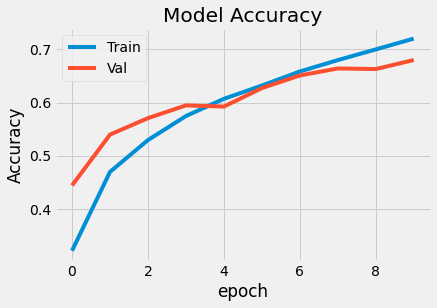

In [29]:
# Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['Train','Val'], loc='upper left')
plt.show()

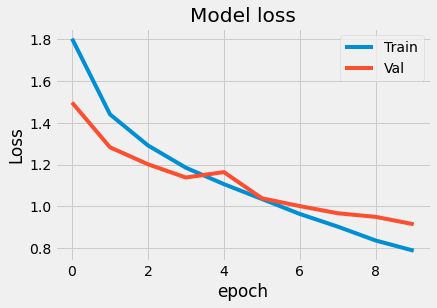

In [30]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [32]:
# Test the model with an example
from google.colab import files
uploaded=files.upload()

ModuleNotFoundError: No module named 'google.colab'